In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('Most Popular Programming Languages.csv')
df.head()

,Month_Year,Year,Python,JavaScript,Java,C#,PhP,Flutter,React,Swift,TypeScript,Matlab
0,2004-01,2004,30,98,96,76,100,6,1,9,2,78
1,2004-02,2004,29,98,97,86,99,6,2,9,1,91
2,2004-03,2004,28,100,100,87,97,5,2,9,2,99
3,2004-04,2004,28,98,97,89,100,6,1,9,2,95
4,2004-05,2004,28,91,99,84,92,6,2,10,3,86


In [6]:
# change data type to date and time
df["Month_Year"] = df["Month_Year"].astype("datetime64[ns]")

In [8]:
# extract year solumn from month and year column
df["Year"] = df["Month_Year"].dt.year
df.head()

,Month_Year,Year,Python,JavaScript,Java,C#,PhP,Flutter,React,Swift,TypeScript,Matlab
0,2004-01-01,2004,30,98,96,76,100,6,1,9,2,78
1,2004-02-01,2004,29,98,97,86,99,6,2,9,1,91
2,2004-03-01,2004,28,100,100,87,97,5,2,9,2,99
3,2004-04-01,2004,28,98,97,89,100,6,1,9,2,95
4,2004-05-01,2004,28,91,99,84,92,6,2,10,3,86


In [16]:
#set year column as index column
df.set_index("Year",inplace=True)
df

,Month_Year,Python,JavaScript,Java,C#,PhP,Flutter,React,Swift,TypeScript,Matlab
Year,,,,,,,,,,,
2004,2004-01,30,98,96,76,100,6,1,9,2,78
2004,2004-02,29,98,97,86,99,6,2,9,1,91
2004,2004-03,28,100,100,87,97,5,2,9,2,99
2004,2004-04,28,98,97,89,100,6,1,9,2,95
2004,2004-05,28,91,99,84,92,6,2,10,3,86
...,...,...,...,...,...,...,...,...,...,...,...
2024,2024-05,80,36,14,32,18,92,96,61,80,69
2024,2024-06,76,32,14,30,18,84,87,61,76,67
2024,2024-07,75,33,14,29,17,84,92,55,80,65


In [23]:
# now we have no longer need of month and year column so drop that
df.drop(columns= "Month_Year",inplace=True)
df

,Python,JavaScript,Java,C#,PhP,Flutter,React,Swift,TypeScript,Matlab
Year,,,,,,,,,,
2004,30,98,96,76,100,6,1,9,2,78
2004,29,98,97,86,99,6,2,9,1,91
2004,28,100,100,87,97,5,2,9,2,99
2004,28,98,97,89,100,6,1,9,2,95
2004,28,91,99,84,92,6,2,10,3,86
...,...,...,...,...,...,...,...,...,...,...
2024,80,36,14,32,18,92,96,61,80,69
2024,76,32,14,30,18,84,87,61,76,67
2024,75,33,14,29,17,84,92,55,80,65


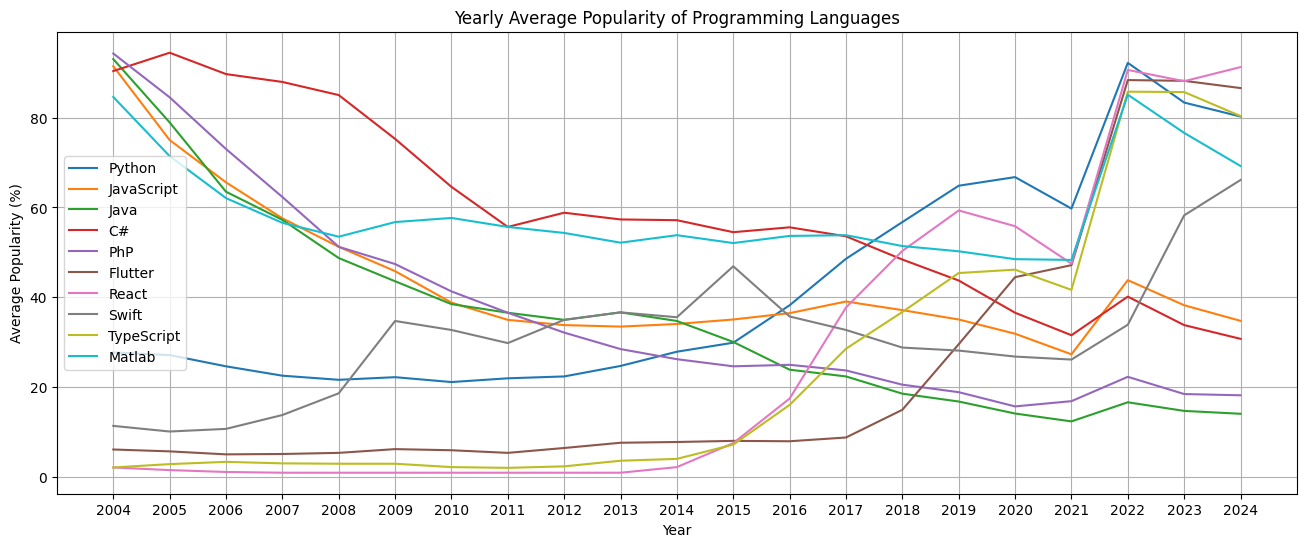

In [37]:
# get the average popularity of langauges by year
df1 = df.groupby(df.index).mean()
ax = df1.plot(kind="line",figsize=(16,6) )
plt.title('Yearly Average Popularity of Programming Languages')
plt.xlabel('Year')
plt.ylabel('Average Popularity (%)')
ax.set_xticks(df1.index)  # Set x-ticks to the index (years)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.grid(True)
plt.show()

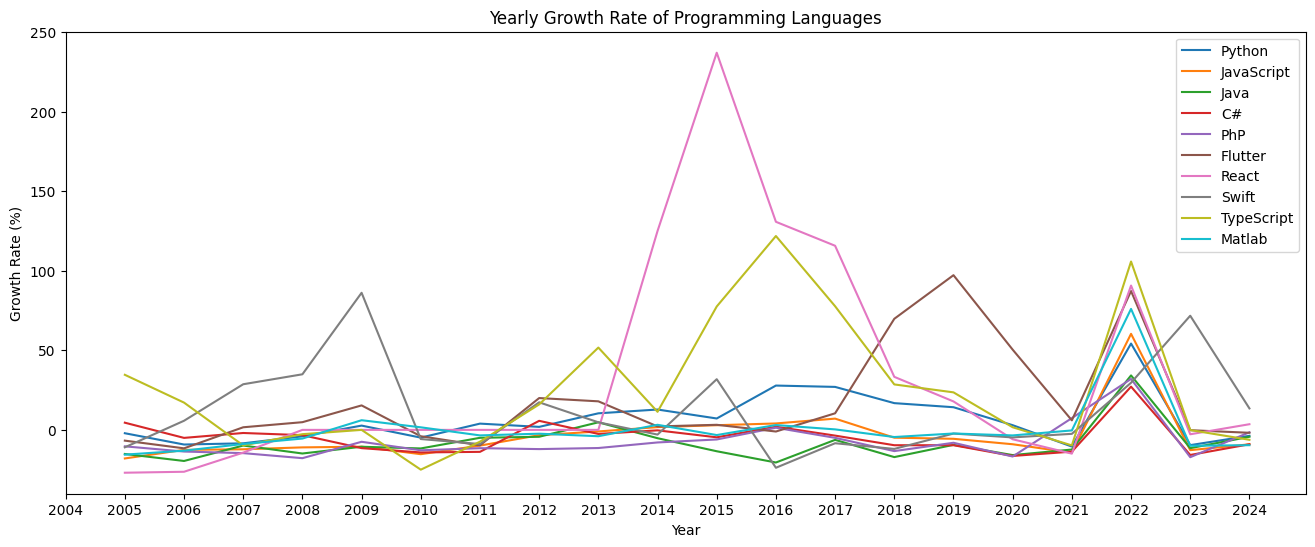

In [41]:
# Calculate the growth rate
growth_rate = df1.pct_change() * 100  

ax = growth_rate.plot(kind='line', figsize=(16, 6))

# Adding title and labels
plt.title('Yearly Growth Rate of Programming Languages')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')

ax.set_xticks(growth_rate.index)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.show()



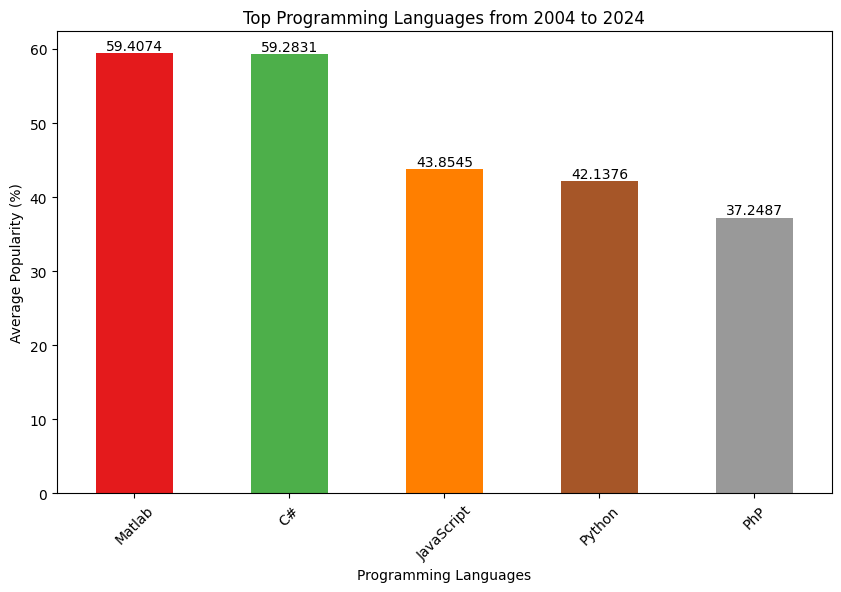

In [59]:
start_year = 2004
end_year = 2024

range_data = df1.loc[start_year:end_year]

average_range_data = range_data.mean()

top_languages_range = average_range_data.sort_values(ascending=False)

top_n_range = top_languages_range.head(5)


colors = plt.cm.Set1(np.linspace(0, 1, len(top_n_range)))

ax = top_n_range.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title(f'Top Programming Languages from {start_year} to {end_year}')
plt.xlabel('Programming Languages')
plt.ylabel('Average Popularity (%)')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)  
plt.show()



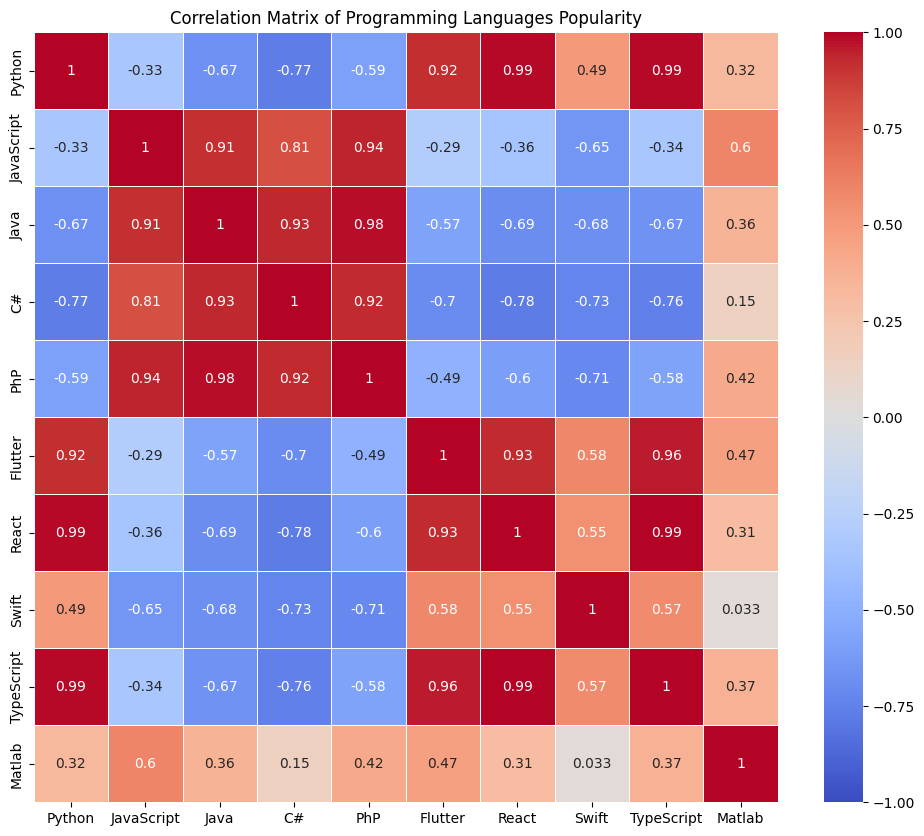

In [64]:

correlation_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Programming Languages Popularity')
plt.show()
correlations = correlation_matrix.unstack()
sorted_correlations = correlations.sort_values(ascending=False)
strong_correlations = sorted_correlations[sorted_correlations < 1].drop_duplicates()

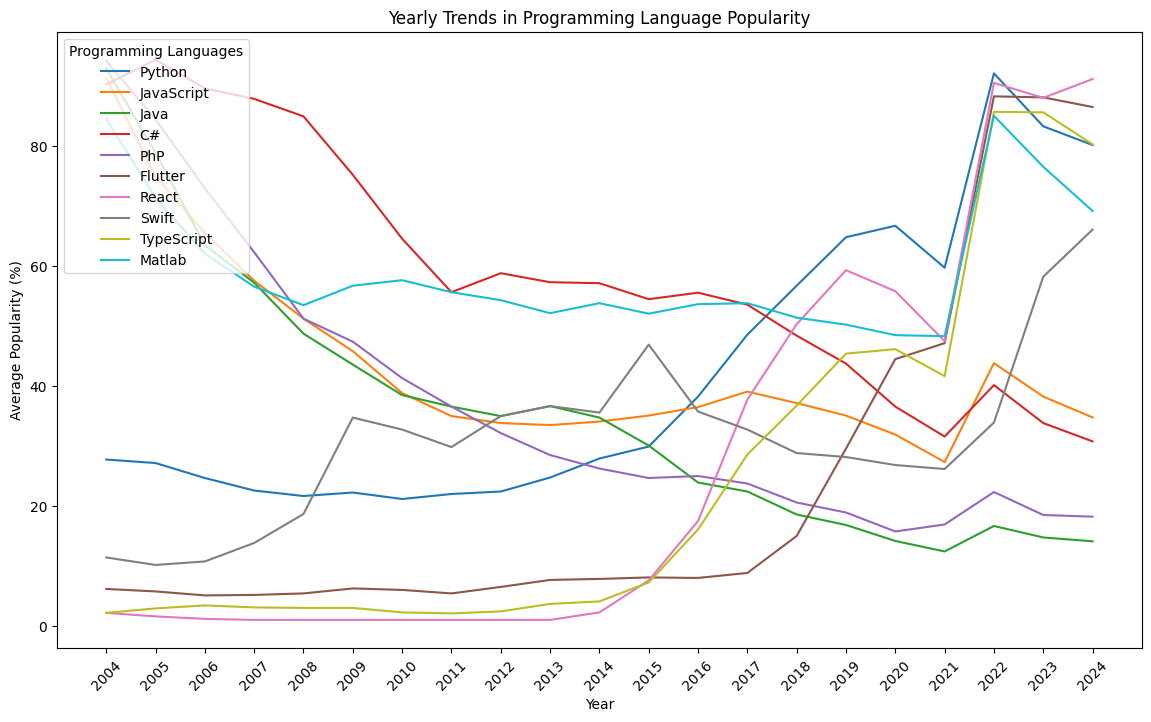

In [68]:


plt.figure(figsize=(14, 8))

for language in df1.columns:
    plt.plot(df1.index, df1[language], label=language)


plt.title('Yearly Trends in Programming Language Popularity')
plt.xlabel('Year')
plt.ylabel('Average Popularity (%)')
plt.xticks(ticks=df1.index, rotation=45)
plt.legend(title="Programming Languages", loc="upper left")

plt.show()


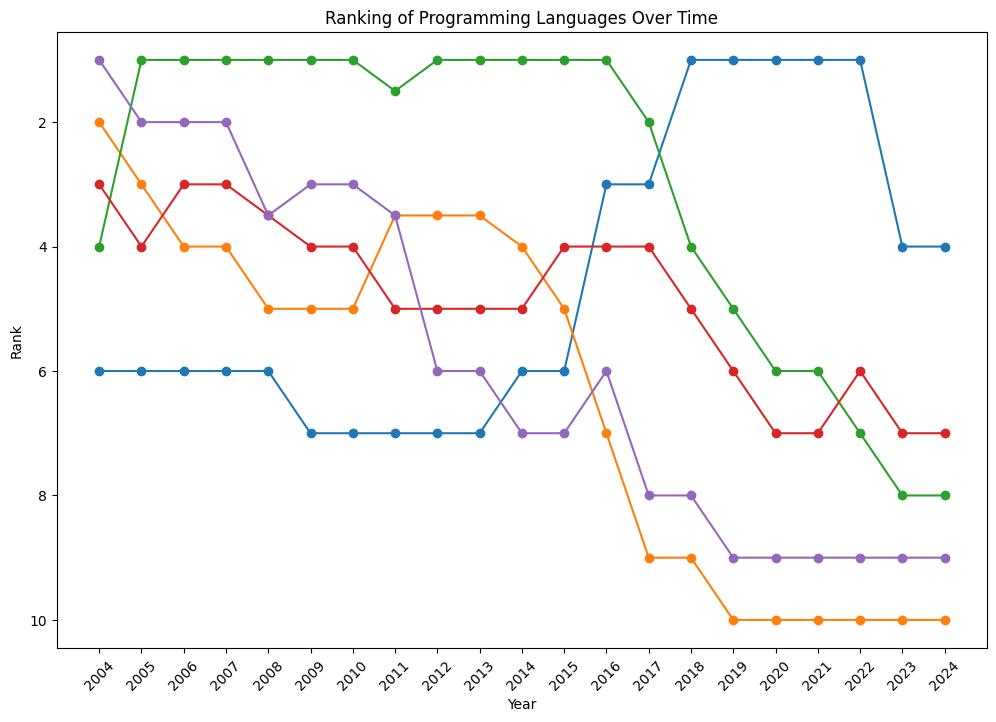

In [85]:
# Step 1: Rank programming languages for each year
ranked_df = df1.rank(axis=1, ascending=False)  # Rank languages by popularity (highest popularity = 1)


# Step 2: Plot the rankings over time using a line plot (bump chart)
plt.figure(figsize=(12, 8))

# Loop over the top languages (e.g., Top 5)
top_languages = ['Python', 'Java', 'C#', 'JavaScript', 'PhP']  # Adjust this list to your top languages
for lang in top_languages:
    plt.plot(ranked_df.index, ranked_df[lang], label=lang, marker='o')

# Customize the chart
plt.title('Ranking of Programming Languages Over Time')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.xticks(ticks=ranked_df.index, labels=ranked_df.index.astype(int), rotation=45)
plt.show()



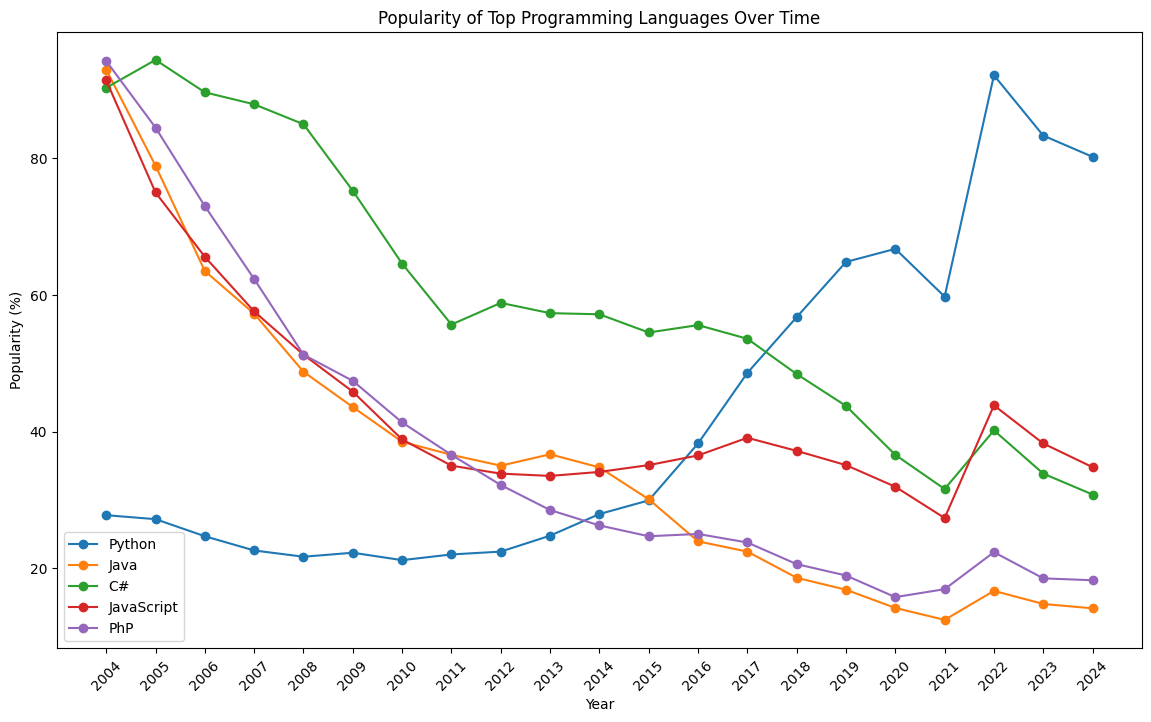

In [94]:

top_n_languages = ['Python', 'Java', 'C#', 'JavaScript', 'PhP']
df_top_n = df1[top_n_languages]

ax = df_top_n.plot(kind='line', marker='o', figsize=(14, 8))  # Specify figsize here
plt.title('Popularity of Top Programming Languages Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity (%)')
plt.xticks(ticks=df_top_n.index, labels=df_top_n.index.astype(int), rotation=45)

plt.show()
